In [1]:
#We will predict the number of bikes that will be rented per hour:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("bike_rentals.csv")

In [4]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.describe() #only for continuous variables

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
#Finding if null values are present in our data
df.isnull() #False indicates these are not null values

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,False,False,False,False,False,False,False,False,False,False,False,False
10882,False,False,False,False,False,False,False,False,False,False,False,False
10883,False,False,False,False,False,False,False,False,False,False,False,False
10884,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# finding total null values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
#We will remove datetime column as all the information have been extracted from it
df.drop(['datetime'],axis = 1, inplace = True)

In [10]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


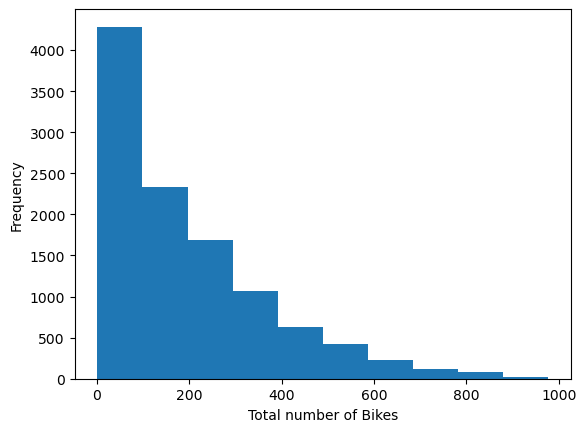

In [11]:
#Plotting a histogram to visualise the data

plt.hist(df['count'],)
plt.xlabel('Total number of Bikes')
plt.ylabel('Frequency')
plt.show()

           

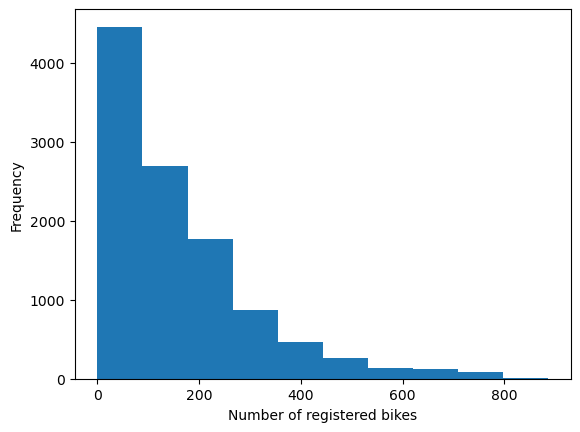

In [12]:

plt.hist(df['registered'],)
plt.xlabel('Number of registered bikes')
plt.ylabel('Frequency')
plt.show()

           

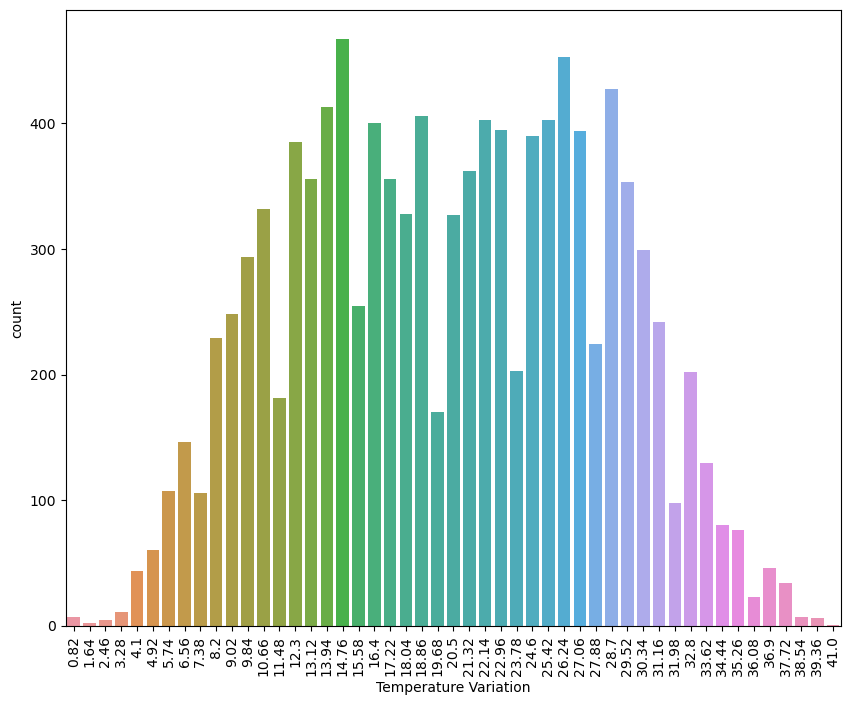

In [13]:
plt.figure(figsize = (10,8))
sns.countplot( x = 'temp', data = df )
plt.xlabel('Temperature Variation')
plt.xticks(rotation = 90)
plt.show()


In [14]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [15]:
X = df.iloc[:,:-1] #:All the rows, :-1 All the columns except last
Y = df.iloc[:, -1] #-1 for Target variable


In [16]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,1,0,0,1,9.84,14.395,81,0.0000,3,13
1,1,0,0,1,9.02,13.635,80,0.0000,8,32
2,1,0,0,1,9.02,13.635,80,0.0000,5,27
3,1,0,0,1,9.84,14.395,75,0.0000,3,10
4,1,0,0,1,9.84,14.395,75,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117


In [17]:
Y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
 X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state = 100, train_size=.80)

In [20]:
X_train.shape

(8708, 10)

In [21]:
Y_train.shape

(8708,)

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)  #Fitting the model on X_train and Y_train

RandomForestRegressor()

In [24]:
#Prediction of result and saving them in a new variable
y_predict = rf.predict(X_test)
y_predict
#Output gives numbder of bikes rented per hour:

array([511.59, 147.75, 274.75, ...,  19.98, 129.34, 296.22])

In [25]:
y_predict[0:5]

array([511.59, 147.75, 274.75,  23.19,  81.4 ])

In [26]:
Y_test[0:5]

7810    513
1366    148
2494    275
3555     24
771      82
Name: count, dtype: int64

In [27]:
#Checking accuracy metrics
from sklearn.metrics import mean_squared_error

In [28]:
mean_squared_error(Y_test, y_predict)

8.048266391184573

In [29]:
np.sqrt(mean_squared_error(Y_test, y_predict)) #Root mmean square error

2.8369466669616075